In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
data = pd.read_csv('transactions.csv')

In [131]:
data.shape

(131994, 9)

In [132]:
data.columns = [col.lower() if col.isupper() else col for col in data.columns]
data.head()
#column names are lowercased and then displayed

,transaction_date,client_id,transaction_id,product_id,product_name,price_vat,quantity,client_type,product_category
0,2024-06-28,f218bbcf08,576a451c59,fc56dbc6d4,"""CIGARE"" HOEGAARDEN BLANCHE IFK",3.44,19.0,Bar Restaurant,Biere
1,2024-06-28,f218bbcf08,576a451c59,fa2b7af0a8,""" CIGARE"" ABBAYE LEFFE BLDE IFK",4.22,22.0,Bar Restaurant,Biere
2,2024-06-28,f218bbcf08,576a451c59,a9b9bd8e0e,DOM. COUSSIN ROSE 23 CROIX PRIEUR,7.00,5.0,Bar Restaurant,Vins
3,2024-06-28,f218bbcf08,576a451c59,8bcbb4c131,PUR GRIS ROSE VDP MEDITERRANNEE,4.32,12.0,Bar Restaurant,Vins
4,2024-06-28,cb6df13f84,6d77640593,e3f6959781,MARTINI ROSSO CRD,10.33,2.0,Bar Restaurant,BOIS. AROMATISES A BASE D


# Exploratory data analysis
First, a look at the data quality

In [133]:
data.describe()

,price_vat,quantity
count,131994.000000,131994.000000
mean,5.209416,25.308105
std,10.780691,82.336654
min,0.000000,-4775.000000
25%,0.960000,2.000000
50%,2.910000,12.000000
75%,5.630000,26.000000
max,564.520000,5654.000000


a few values seem odd, such as negative values for quantities, and zeros for the prices

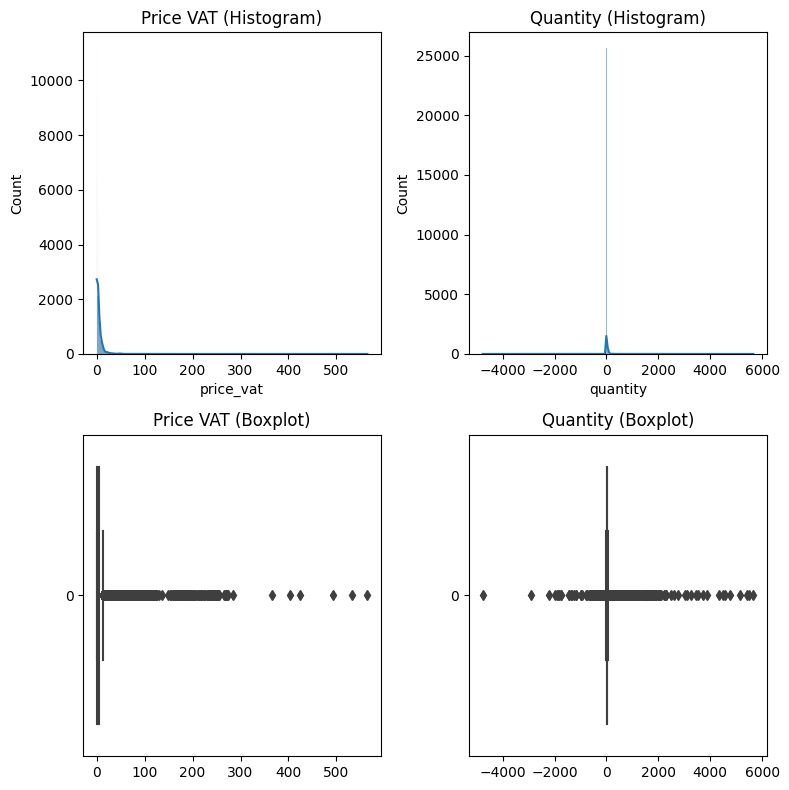

In [135]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

sns.histplot(data['price_vat'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Price VAT (Histogram)')

sns.histplot(data['quantity'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Quantity (Histogram)')

sns.boxplot(data=data['price_vat'], ax=axs[1, 0], orient='h')
axs[1, 0].set_title('Price VAT (Boxplot)')

sns.boxplot(data=data['quantity'], ax=axs[1, 1], orient='h')
axs[1, 1].set_title('Quantity (Boxplot)')

plt.tight_layout()
plt.show()

In [136]:
data.isnull().sum()

transaction_date      0
client_id             0
transaction_id        0
product_id            0
product_name          0
price_vat             0
quantity              0
client_type           0
product_category    188
dtype: int64

In [137]:
data.price_vat[data.price_vat <= 0].count()/len(data)
# there are 5% of transactions with a price_vat of 0 or less

0.048434019728169464

In [138]:
data.quantity[data.quantity <= 0].count()/len(data)
#there are 2% of transactions with a quantity of 0 or less

0.02075094322469203

In [139]:
data.product_category.isnull().sum()/len(data)
# there are very few missing values for the product category

0.0014243071654772186

In [140]:
data.duplicated().sum()

12

In [141]:
data.drop_duplicates(inplace=True)

In [142]:
clean_data = data[(data.price_vat > 0) & (data.quantity > 0) & (data.product_category.notnull())]

In [143]:
len(clean_data)/len(data)

0.931990726008092

- Duplicates, zeros, negative values, and missing values and nullvalues are detected in the dataset
- Assumptions is made that they are part of the data (e.g. discounts and free products)
- Erroneous values are being removed from the dataset they represent a small percentage (7%) of the data for this exercise - into a clean_data dataframe

In [144]:
clean_data.head()

,transaction_date,client_id,transaction_id,product_id,product_name,price_vat,quantity,client_type,product_category
0,2024-06-28,f218bbcf08,576a451c59,fc56dbc6d4,"""CIGARE"" HOEGAARDEN BLANCHE IFK",3.44,19.0,Bar Restaurant,Biere
1,2024-06-28,f218bbcf08,576a451c59,fa2b7af0a8,""" CIGARE"" ABBAYE LEFFE BLDE IFK",4.22,22.0,Bar Restaurant,Biere
2,2024-06-28,f218bbcf08,576a451c59,a9b9bd8e0e,DOM. COUSSIN ROSE 23 CROIX PRIEUR,7.00,5.0,Bar Restaurant,Vins
3,2024-06-28,f218bbcf08,576a451c59,8bcbb4c131,PUR GRIS ROSE VDP MEDITERRANNEE,4.32,12.0,Bar Restaurant,Vins
4,2024-06-28,cb6df13f84,6d77640593,e3f6959781,MARTINI ROSSO CRD,10.33,2.0,Bar Restaurant,BOIS. AROMATISES A BASE D


## Most popular products by revenue
Creation of a revenue feature

In [145]:
clean_data['revenue'] = clean_data['price_vat'] * clean_data['quantity']

/var/folders/1f/zhjqphp10m9f4rqq73knjdyr0000gn/T/ipykernel_45628/120068845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['revenue'] = clean_data['price_vat'] * clean_data['quantity']


after calculating revenues for each observation, we can group by product category or client type

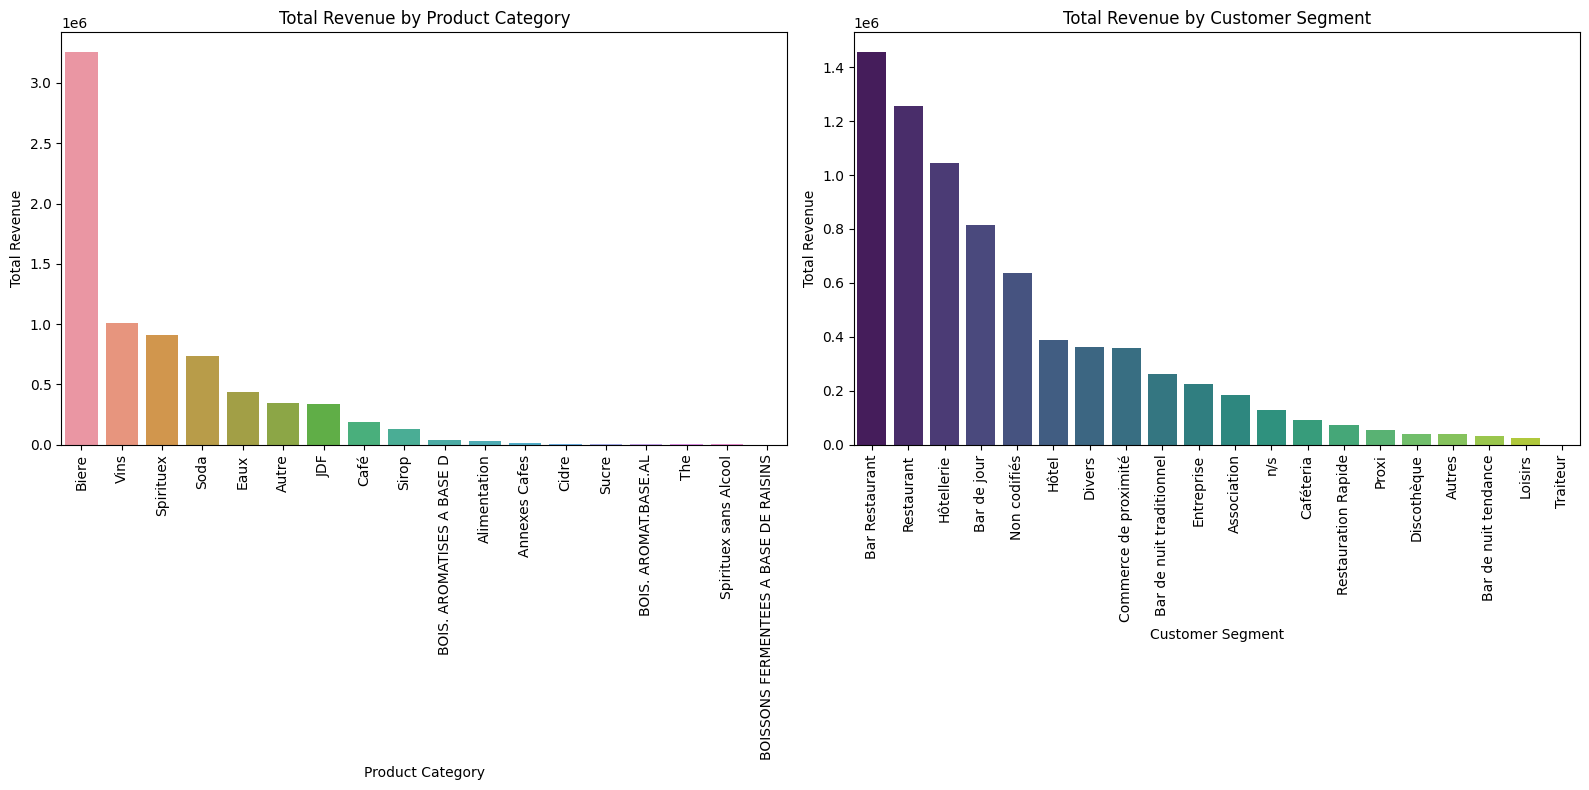

In [146]:
# Calculation of revenue  by product category
revenue_summary_product = clean_data.groupby('product_category')['revenue'].sum().reset_index()
revenue_summary_product = revenue_summary_product.sort_values(by='revenue', ascending=False)

# Calculation of revenue by customer segment
customer_segment_revenue = clean_data.groupby('client_type')['revenue'].sum().reset_index()
customer_segment_revenue = customer_segment_revenue.sort_values(by='revenue', ascending=False)

# Creation of a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))  # 2 rows, 1 column

# Bar plot for total revenue by product category
sns.barplot(x='product_category', y='revenue', data=revenue_summary_product, ax=axs[0])
axs[0].set_title('Total Revenue by Product Category')
axs[0].set_xlabel('Product Category')
axs[0].set_ylabel('Total Revenue')
axs[0].tick_params(axis='x', rotation=90)  # Rotate x labels for better visibility

# Bar plot for total revenue by customer segment
sns.barplot(x='client_type', y='revenue', data=customer_segment_revenue, ax=axs[1], palette='viridis')
axs[1].set_title('Total Revenue by Customer Segment')
axs[1].set_xlabel('Customer Segment')
axs[1].set_ylabel('Total Revenue')
axs[1].tick_params(axis='x', rotation=90)  # Rotate x labels for better visibility

# Adjust layout
plt.tight_layout()
plt.show()

# A few comments on the categorical variables: Product category and client type
### Product_categories could be more specifically defined - what is Autres when there are so many categories in total ?
### client_id has various issues
- n/s is not defined
- Divers, non codifiésn n/s and Autres are not specific enough, although when grouped together are a significant chunk of the data
- A few redundancies, such as Hotellerie and Hôtel, Bar Restaurant & Restaurant & Bar de jour & Bar de nuit traditionnel, commerce de proximité & proxi

In [147]:
clean_data.client_type.sort_values().unique()

array(['Association', 'Autres', 'Bar Restaurant', 'Bar de jour',
       'Bar de nuit tendance', 'Bar de nuit traditionnel', 'Caféteria',
       'Commerce de proximité', 'Discothèque', 'Divers', 'Entreprise',
       'Hôtel', 'Hôtellerie', 'Loisirs', 'Non codifiés', 'Proxi',
       'Restaurant', 'Restauration Rapide', 'Traiteur', 'n/s'],
      dtype=object)

#### We will group certain client types with a function

In [148]:
def customer_segmentation(client_type):
    if client_type in ['n/s', 'Divers', 'Non codifiés']:
        return 'Autres'
    elif client_type == 'Hôtel':
        return 'Hôtellerie'
    elif client_type == 'Proxi':
        return 'Commerce de proximité'
    else:
        return client_type

#### the function is applied to the client_type column and returns into a newly create column customer segment

In [149]:
clean_data['customer_segment'] = clean_data['client_type'].apply(customer_segmentation)

/var/folders/1f/zhjqphp10m9f4rqq73knjdyr0000gn/T/ipykernel_45628/3337067745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['customer_segment'] = clean_data['client_type'].apply(customer_segmentation)


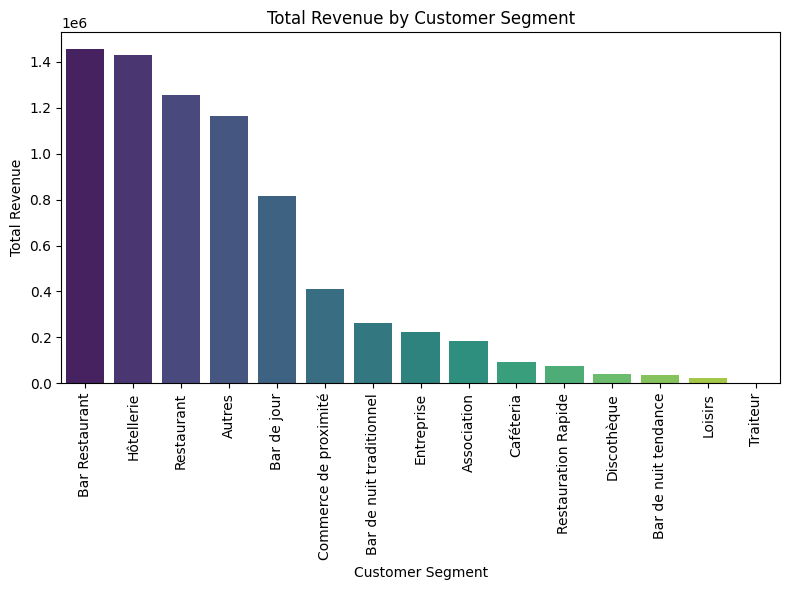

In [150]:
# Calculation of revenue by customer segment
customer_segment_revenue = clean_data.groupby('customer_segment')['revenue'].sum().reset_index()
customer_segment_revenue = customer_segment_revenue.sort_values(by='revenue', ascending=False)

# Create the bar plot for total revenue by customer segment
plt.figure(figsize=(8, 6))
sns.barplot(x='customer_segment', y='revenue', data=customer_segment_revenue, palette='viridis')

# Customize the plot
plt.title('Total Revenue by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)  # Rotate x labels for better visibility

# Show the plot
plt.tight_layout()
plt.show()

### When rearranging the client_type in more logical manner, we observe that Hôtellerie becomes the second most important segment
### The  newly defined 'Autres' segment is the 4th most important one and yet it does not contain any relevant information for our analysis
### One can challenge the grouping of 'Bar Restaurant' & 'Restaurant' & 'Bar jour' & 'Bar nuit' etc.

# Dealing with Price outliers

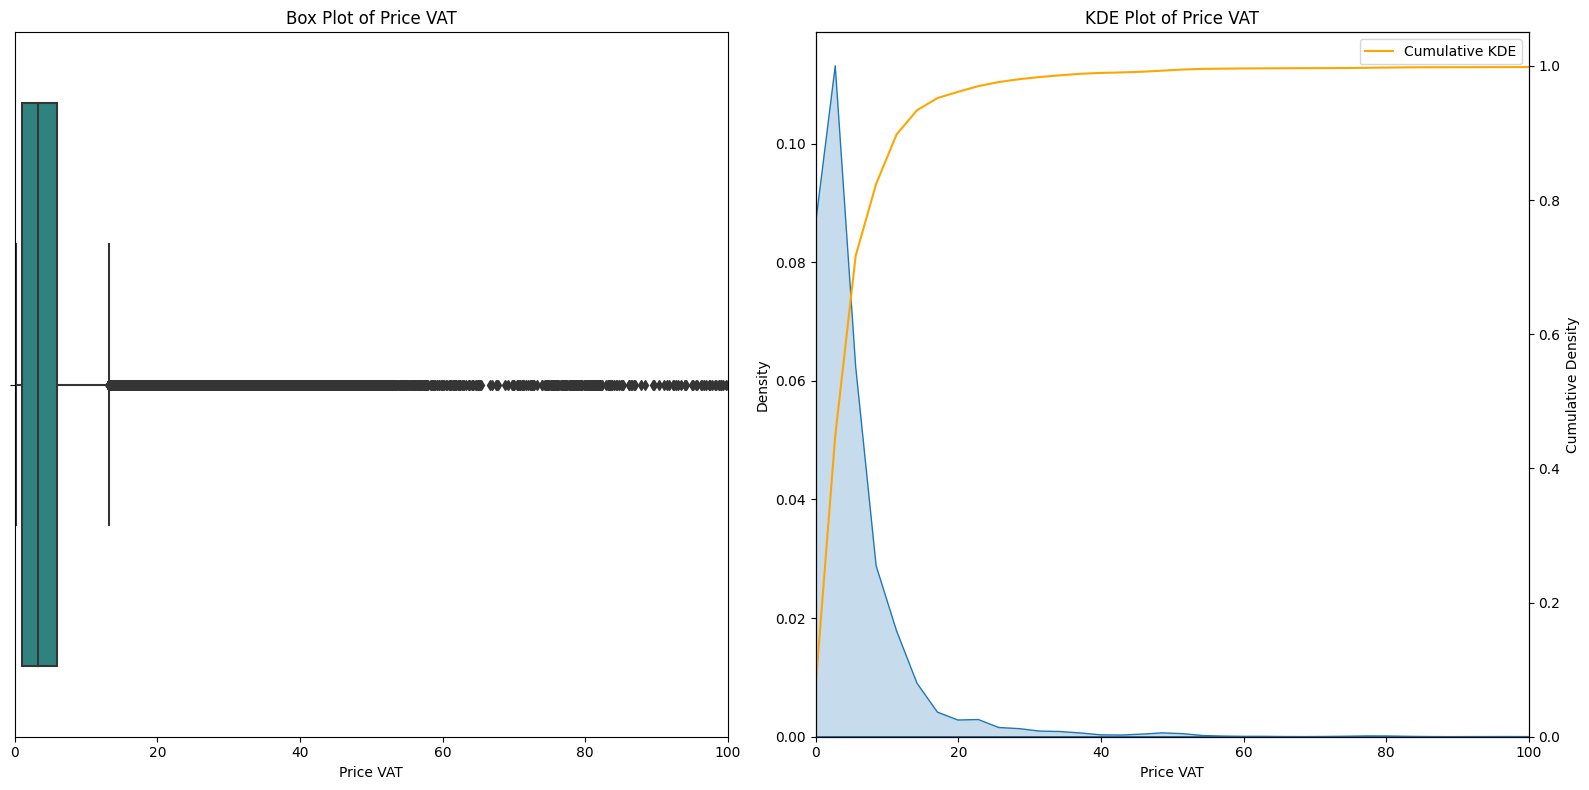

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creation of a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns

# Create a box plot for price_vat to identify outliers in the first subplot
sns.boxplot(x=clean_data['price_vat'], palette='viridis', ax=axs[0])
axs[0].set_title('Box Plot of Price VAT')
axs[0].set_xlabel('Price VAT')
axs[0].set_xlim(0, 100)  # Set x-axis limit from 0 to 100

# Create a KDE plot for price_vat in the second subplot
sns.kdeplot(x=clean_data['price_vat'], ax=axs[1], fill=True, palette='viridis', label='KDE')
axs[1].set_title('KDE Plot of Price VAT')
axs[1].set_xlabel('Price VAT')
axs[1].set_xlim(0, 100)  # Set x-axis limit from 0 to 100

# Create a secondary y-axis for the cumulative plot
ax2 = axs[1].twinx()  # Create a secondary y-axis sharing the same x-axis
sns.kdeplot(x=clean_data['price_vat'], ax=ax2, cumulative=True, label='Cumulative KDE', color='orange')

# Customize the secondary y-axis
ax2.set_ylabel('Cumulative Density')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


## To determine which points are outliers, we calculate the z-score for each point. Points with a zscore > 3 are determined outliers
## another options could be to remove any points outside of the boxplot whiskers (more drastic)

In [152]:
from scipy import stats

z_scores = stats.zscore(clean_data['price_vat'])
data_no_out = clean_data[(z_scores < 3)]

In [153]:
outlier_removal_rate = 1-(len(data_no_out)/len(clean_data))
print(f'data removal rate when dealing with price outliers is {outlier_removal_rate:.2%}')

data removal rate when dealing with price outliers is 1.12%


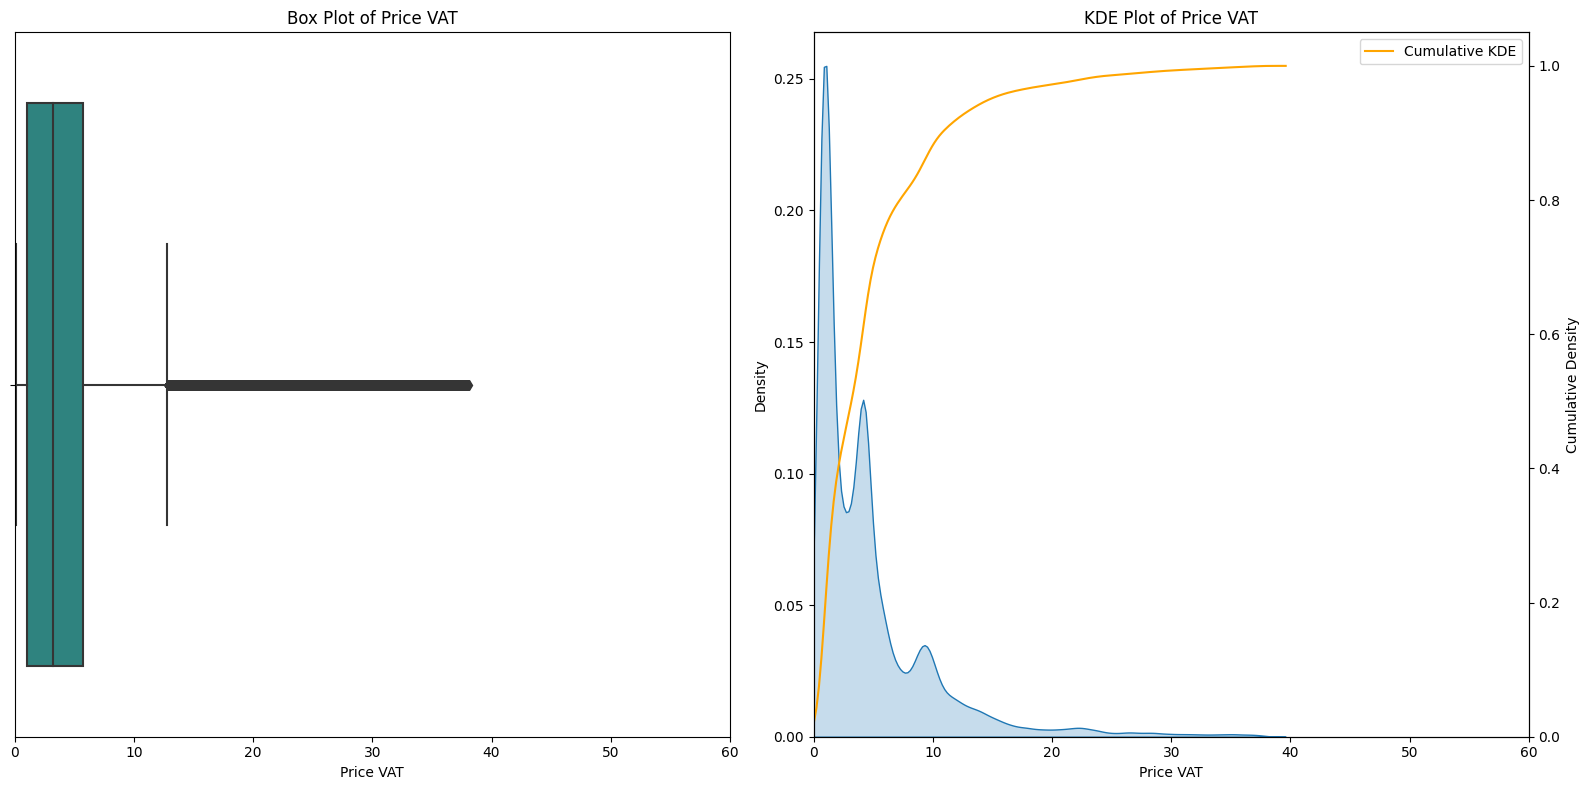

In [154]:
# Creation of a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns

# Create a box plot for price_vat to identify outliers in the first subplot
sns.boxplot(x=data_no_out['price_vat'], palette='viridis', ax=axs[0])
axs[0].set_title('Box Plot of Price VAT')
axs[0].set_xlabel('Price VAT')
axs[0].set_xlim(0, 60)  # Set x-axis limit from 0 to 100

# Create a KDE plot for price_vat in the second subplot
sns.kdeplot(x=data_no_out['price_vat'], ax=axs[1], fill=True, palette='viridis', label='KDE')
axs[1].set_title('KDE Plot of Price VAT')
axs[1].set_xlabel('Price VAT')
axs[1].set_xlim(0, 60)  # Set x-axis limit from 0 to 100

# Create a secondary y-axis for the cumulative plot
ax2 = axs[1].twinx()  # Create a secondary y-axis sharing the same x-axis
sns.kdeplot(x=data_no_out['price_vat'], ax=ax2, cumulative=True, label='Cumulative KDE', color='orange')

# Customize the secondary y-axis
ax2.set_ylabel('Cumulative Density')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


- the removal of these outliers does not impact much of the total data volume. Another option could have to use a Log transformation to reduce the skewness of the data

# Seasonality analysis

/var/folders/1f/zhjqphp10m9f4rqq73knjdyr0000gn/T/ipykernel_45628/3639396610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_out['transaction_date'] = pd.to_datetime(data_no_out['transaction_date'])


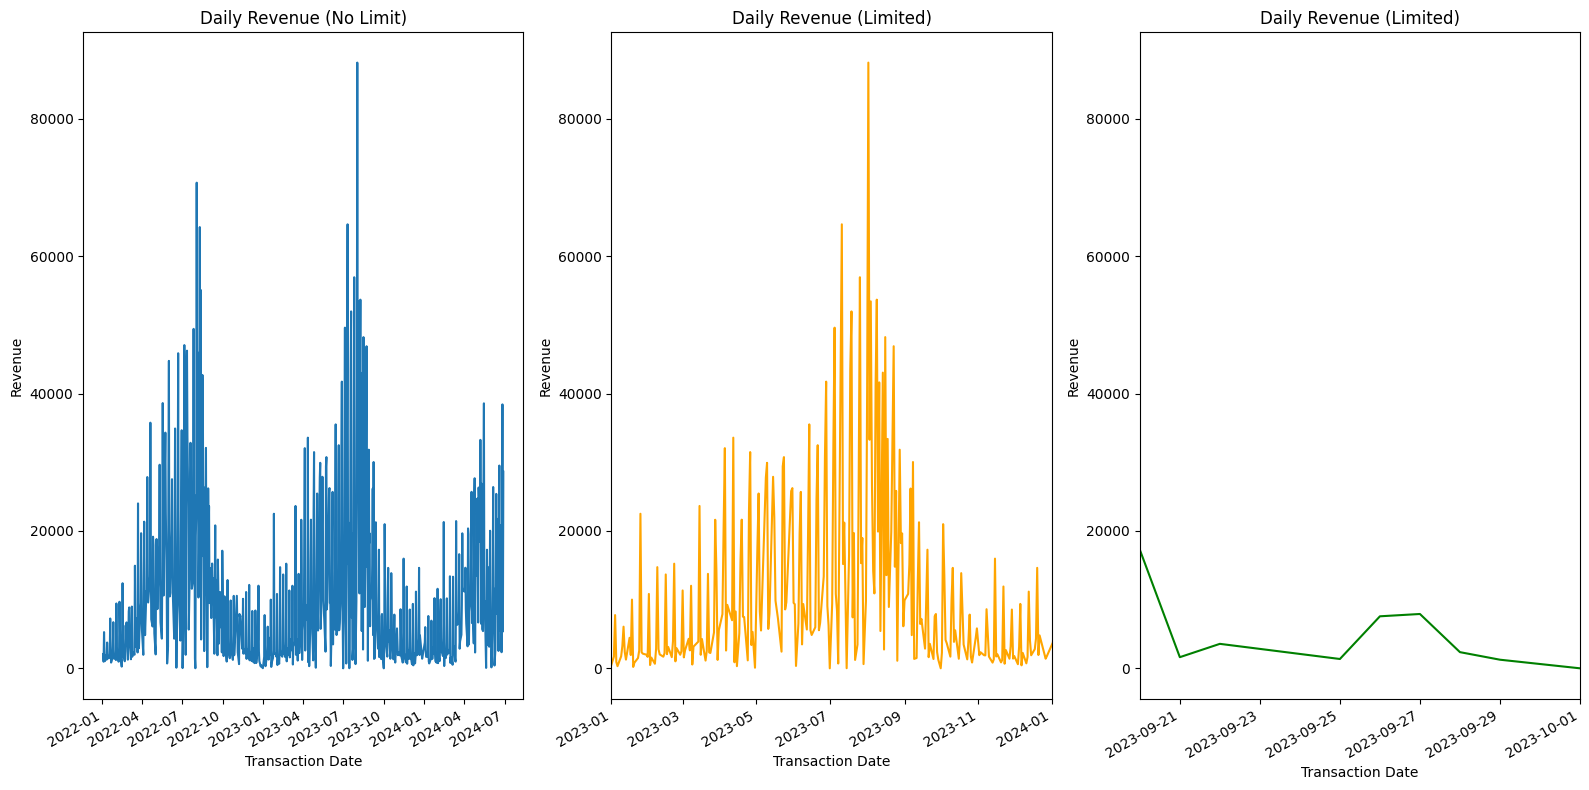

In [155]:
# Assuming 'data_no_out' is your DataFrame and 'transaction_date' is in datetime format
data_no_out['transaction_date'] = pd.to_datetime(data_no_out['transaction_date'])

# Grouping by 'transaction_date' and summing the 'revenue'
daily_revenue = data_no_out.groupby('transaction_date')['revenue'].sum()

## Creation of a figure with 2 subplots
fig, axs = plt.subplots(1, 3, figsize=(16, 8))  # 1 row, 2 columns
# Plotting daily revenue without limit
daily_revenue.plot(ax=axs[0], title='Daily Revenue (No Limit)', ylabel='Revenue')
axs[0].set_xlabel('Transaction Date')

# Plotting daily revenue with limit from January 1, 2023 to January 1, 2024
daily_revenue.plot(ax=axs[1], title='Daily Revenue (Limited)', ylabel='Revenue', color='orange')
axs[1].set_xlim(left=pd.Timestamp('2023-01-01'), right=pd.Timestamp('2024-01-01'))  # Set x-axis limit
axs[1].set_xlabel('Transaction Date')

# Plotting daily revenue with limit from August 1, 2023 to August 7, 2023
daily_revenue.plot(ax=axs[2], title='Daily Revenue (Limited)', ylabel='Revenue', color='green')
axs[2].set_xlim(left=pd.Timestamp('2023-09-20'), right=pd.Timestamp('2023-10-01'))  # Set x-axis limit
axs[2].set_xlabel('Transaction Date')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# there are clear seasonal patterns
 - summer months yield higher revenues, most likely because client types (hotels, restaurant and bars mainly) benefit from summer holiday season
 - additionally it looks like there is a peak during the week

# Revenues during the day of the week

/var/folders/1f/zhjqphp10m9f4rqq73knjdyr0000gn/T/ipykernel_45628/209188411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_out['day_of_week'] = data_no_out['transaction_date'].dt.dayofweek + 1  # +1 to make it 1-7
/var/folders/1f/zhjqphp10m9f4rqq73knjdyr0000gn/T/ipykernel_45628/209188411.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_out['year'] = data_no_out['transaction_date'].dt.year


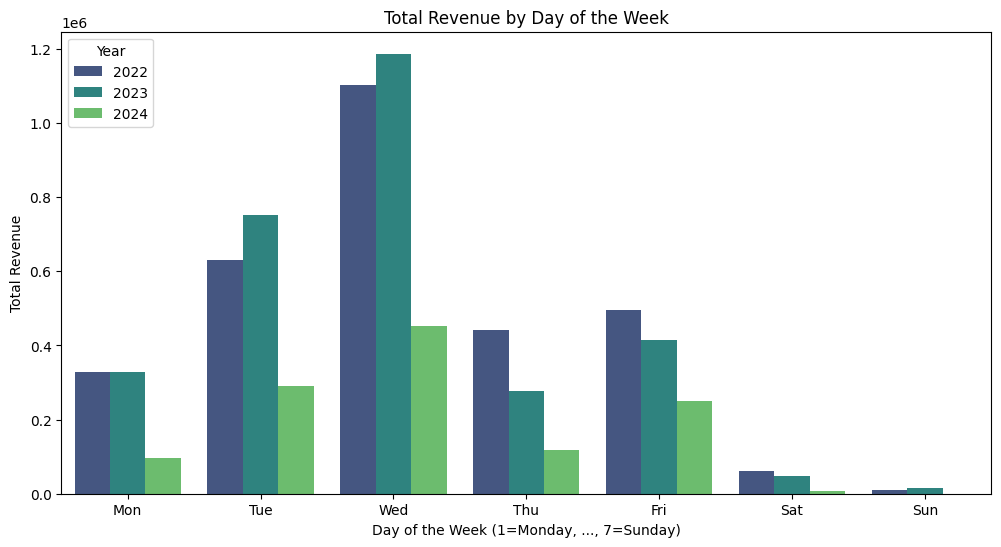

In [156]:
# Extract the day of the week from the transaction_date
data_no_out['day_of_week'] = data_no_out['transaction_date'].dt.dayofweek + 1  # +1 to make it 1-7

# Extract year from transaction_date and create a new column 'year'
data_no_out['year'] = data_no_out['transaction_date'].dt.year

# Grouping by 'year' and 'day_of_week', summing the 'revenue'
grouped_revenue = data_no_out.groupby(['year', 'day_of_week'])['revenue'].sum().reset_index()

# Plotting a histogram of revenue by year and day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='revenue', hue='year', data=grouped_revenue, palette='viridis')
plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day of the Week (1=Monday, ..., 7=Sunday)')
plt.ylabel('Total Revenue')
plt.xticks(ticks=range(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Label x-axis
plt.legend(title='Year')
plt.show()

### it is clear that Wednesdays are the days when most revenues are made, probably because Hotel and Restaurants place their orders to build stokc before the weekend
### On the contrary, week-ends see very little ordering, probably because office staff is off / regular staff is busy attending customers ?

# Difference between 2022 and 2023

- to evaluate the shift from year to year, we will reuse the same visual as previously for products and client_types
- this time we will group by year and compute the difference between 2022 and 2023

/var/folders/1f/zhjqphp10m9f4rqq73knjdyr0000gn/T/ipykernel_45628/3140006069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_out['year'] = data_no_out['transaction_date'].dt.year


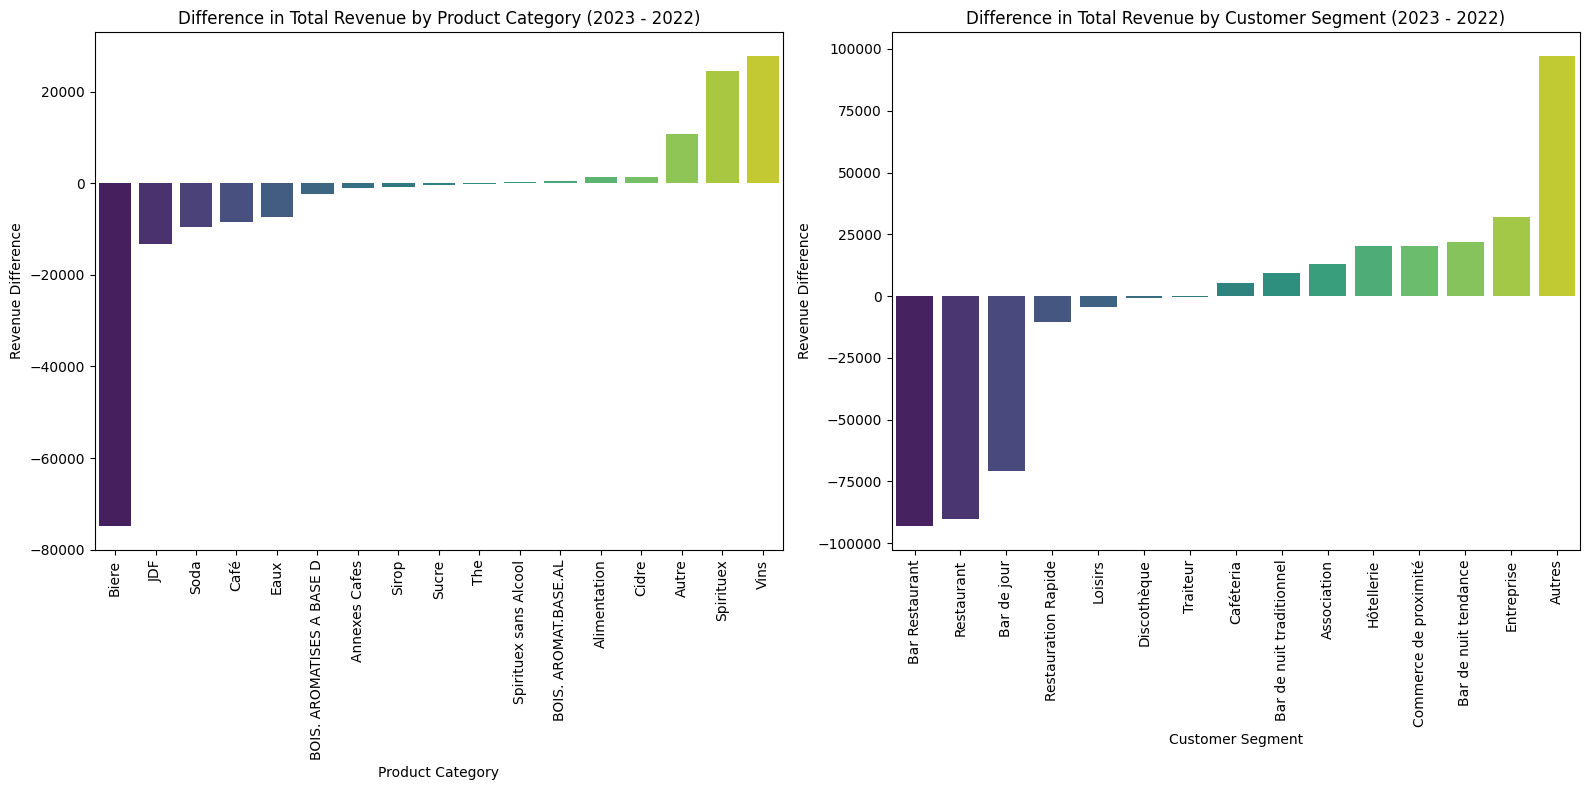

In [157]:
data_no_out['year'] = data_no_out['transaction_date'].dt.year

# data is filtered for the years 2022 and 2023
data_filtered = data_no_out[data_no_out['year'].isin([2022, 2023])]

# Calculation of revenue by product category and by year
revenue_summary_product = data_filtered.groupby(['year', 'product_category'])['revenue'].sum().unstack(fill_value=0)

# Calculation of revenue by customer segment and by year
customer_segment_revenue = data_filtered.groupby(['year', 'customer_segment'])['revenue'].sum().unstack(fill_value=0)

# Calculate the difference in revenues between 2022 and 2023 by product and by customer segment
product_diff = revenue_summary_product.loc[2023] - revenue_summary_product.loc[2022]
customer_segment_diff = customer_segment_revenue.loc[2023] - customer_segment_revenue.loc[2022]

# Sort differences in ascending order
product_diff_sorted = product_diff.sort_values(ascending=True)
customer_segment_diff_sorted = customer_segment_diff.sort_values(ascending=True)

# Creation of a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns

# Bar plot for total revenue difference by product category
sns.barplot(x=product_diff_sorted.index, y=product_diff_sorted.values, ax=axs[0], palette='viridis')
axs[0].set_title('Difference in Total Revenue by Product Category (2023 - 2022)')
axs[0].set_xlabel('Product Category')
axs[0].set_ylabel('Revenue Difference')
axs[0].tick_params(axis='x', rotation=90)  # Rotate x labels for better visibility

# Bar plot for total revenue difference by customer segment
sns.barplot(x=customer_segment_diff_sorted.index, y=customer_segment_diff_sorted.values, ax=axs[1], palette='viridis')
axs[1].set_title('Difference in Total Revenue by Customer Segment (2023 - 2022)')
axs[1].set_xlabel('Customer Segment')
axs[1].set_ylabel('Revenue Difference')
axs[1].tick_params(axis='x', rotation=90)  # Rotate x labels for better visibility

# Adjust layout
plt.tight_layout()
plt.show()

## Between 2022 and 2023, revenues have changed as follows:
- beer has seen the biggest decrease while wine and spiritueux increased their revenues
- bars and restaurants saw the sharpest decrease in revenues while 'Autre' saw an increase
- Conclusions: Probably Covid Lockdown shifted consumption from 'a beer at the bar' to 'a glass of wine at home' (assumption: 'Autres' is most likely at Home, not public places)

------------------------------------------------------------------------

# State calculation – practice - Assumptions
Dropped Products: I analyzed the clients' transaction history, comparing the products they purchased during a reference period (up until May 2024) with their transactions as of June 2024. Products that were purchased during the reference period but not in the current period were classified as "dropped."

Churn Risk: I calculated the churn risk based on declining purchase behavior, such as reduced total revenue and quantities over time. Additionally, I used the total lost revenue from dropped products as an indicator of potential churn risk.

Reference Period: For both analyses, I used the timeframe from the start of the data period until May 2024 as the reference period.

# Dropped Products

In [158]:
# Define reference period
reference_period_start = data_no_out['transaction_date'].min()
reference_period_end = pd.to_datetime('2024-05-31')
current_period_start = reference_period_end + pd.Timedelta(days=1)
current_period_end = data_no_out['transaction_date'].max()

print(f'Reference period: {reference_period_start} to {reference_period_end}')
print(f'Current period: {current_period_start} to {current_period_end}')


Reference period: 2022-01-03 00:00:00 to 2024-05-31 00:00:00
Current period: 2024-06-01 00:00:00 to 2024-06-28 00:00:00


In [159]:
# Orders made during the reference period
orders_reference = data_no_out[
    (data_no_out['transaction_date'] >= reference_period_start) &
    (data_no_out['transaction_date'] <= reference_period_end)
]

# Orders made as of June 2024 (current period)
orders_current = data_no_out[
    (data_no_out['transaction_date'] >= current_period_start) &
    (data_no_out['transaction_date'] <= current_period_end)
]

### creation of two data frames for reference and current period, where we group by client_id and product_id

In [160]:
# Group by client and product for both periods
orders_reference_grouped = orders_reference.groupby(['client_id', 'product_id', 'product_name']).agg(
    {'revenue': 'sum', 'quantity': 'sum'}
).reset_index()

orders_current_grouped = orders_current.groupby(['client_id', 'product_id', 'product_name']).agg(
    {'revenue': 'sum', 'quantity': 'sum'}
).reset_index()

### Merge the reference and current period orders to find dropped products
### Using a left merge from current to ref period will NA if the product is present in the Ref table and was not re-ordered in the current table  


In [161]:
dropped_products = pd.merge(
    orders_reference_grouped, orders_current_grouped,
    on=['client_id', 'product_id'],
    how='left',
    suffixes=('_reference', '_current')
)
# Filter where current period orders are NaN, indicating a dropped product
dropped_products = dropped_products[dropped_products['revenue_current'].isna()]

In [162]:
dropped_products

,client_id,product_id,product_name_reference,revenue_reference,quantity_reference,product_name_current,revenue_current,quantity_current
0,00185f50ae,00328ce57b,LE LOUVETIER ROSE BX AOP,244.36,41.0,NaN,NaN,NaN
1,00185f50ae,03a3d955b8,TURSAN ROSE CUVEE IMPERATRICE,144.90,30.0,NaN,NaN,NaN
2,00185f50ae,058d5d43bf,PAGO ABC PAMPLEMOUSSE ROSE,89.77,71.0,NaN,NaN,NaN
3,00185f50ae,064c3e311e,GRD MARNIER ROUGE,200.20,10.0,NaN,NaN,NaN
5,00185f50ae,0c658eb5d6,DOM. MARQUESTAU RGE IGP LANDES,335.37,67.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
13477,fbeb3d5f8b,ee9d527a0a,REMISE TVA 2,105.88,6.0,NaN,NaN,NaN
13478,fbeb3d5f8b,ef2d127de3,SPRITE,159.11,89.0,NaN,NaN,NaN
13479,fbeb3d5f8b,f0bc318fb8,TARIQUET 1ERE GRIVES BLC M/23,1709.36,212.0,NaN,NaN,NaN
13482,fc3cf8aab4,0cce0bd361,GOTHIC BLONDE M,534.05,279.0,NaN,NaN,NaN


### now we create a dataframe summary of dropped products

In [163]:
# Selecting dropped products and calculating lost revenue and quantity
dropped_products_summary = dropped_products[['client_id', 'product_id', 'product_name_reference' ,'revenue_reference', 'quantity_reference']]
dropped_products_summary = dropped_products_summary.rename(
    columns={'revenue_reference': 'total_lost_revenue', 'quantity_reference': 'total_lost_quantity'}
)

### Group by product_id to Dropped product impact

In [164]:
total_lost_per_product = dropped_products_summary.groupby(['product_id','product_name_reference']).agg(
    total_lost_revenue=('total_lost_revenue', 'sum'),
    total_lost_quantity=('total_lost_quantity', 'sum')
).reset_index().sort_values(by='total_lost_revenue', ascending=False)

total_lost_per_product.head()

,product_id,product_name_reference,total_lost_revenue,total_lost_quantity
380,3c15285c04,AMBAR BLONDE,121997.71,46664.0
714,734d0759cd,STELLA ARTOIS PILS,121440.72,51442.0
1495,ff5a1ae012,GRIMBERGEN BLONDE,118988.34,29801.0
828,8527a891e2,1664,90774.68,26817.0
403,3fdba35f04,COCA COLA,78216.55,78973.0


In [165]:
print(f"Total Revenue Impact from Dropped Products: € {total_lost_per_product.total_lost_revenue.sum():,.0f}")

Total Revenue Impact from Dropped Products: € 3,720,646


# Churn Risk

### Group by client_id to calculate churn risk

In [166]:
# Group by client_id to calculate total lost revenue and total lost quantity per client
total_lost_per_client = dropped_products_summary.groupby('client_id').agg(
    total_lost_revenue=('total_lost_revenue', 'sum'),
    total_lost_quantity=('total_lost_quantity', 'sum')
).reset_index().sort_values(by='total_lost_revenue', ascending=False)

total_lost_per_client.head()

,client_id,total_lost_revenue,total_lost_quantity
144,806c9f4425,234144.21,91566.0
151,8679fa72f2,158038.67,59995.0
64,339bc58604,113091.16,49251.0
117,6803452806,100723.74,37221.0
216,bf5165a7ec,90977.82,46383.0


In [167]:
revenue_risk_churned_clients = total_lost_per_client['total_lost_revenue'].sum()

In [168]:
print(f"Total Revenue Impact from inactive cleints: € {revenue_risk_churned_clients:,.0f}")

Total Revenue Impact from inactive cleints: € 3,720,646


# Challenges with Churn Risk Calculation:
Weak Signals: As churn is typically driven by weak and often delayed signals, it was challenging to identify high churn risk based only on immediate drops in purchases. The signal for churn could be diluted by seasonality or if a client makes a one-time order.
Few options could be:
- incorporating a time-based analysis (e.g., declining purchase trends over several months) 
- external data such as market competition or regional factors.  Adding more features like customer support interactions, feedback, time since last order, seasonality trends, and competitor actions could provide a more robust signal. 
- Including customer segmentation (e.g., type of bar or restaurant) could help refine churn models.

In [169]:
# Churn risk calculation with FBProphet Algorithm

### Definition of is_churn feature

In [170]:
churn_threshold_date = current_period_start

# Create a flag for clients who have not ordered in the last month
data_no_out['is_churned'] = data_no_out.groupby('client_id')['transaction_date'].transform(lambda x: x.max() < current_period_start)

# Group by client and get their last order date into another dataframe
last_order_dates = data_no_out.groupby('client_id')['transaction_date'].max().reset_index()

# Mark clients with churn risk
last_order_dates['churn_risk'] = last_order_dates['transaction_date'].apply(lambda x: 'high' if x < churn_threshold_date else 'low')

/var/folders/1f/zhjqphp10m9f4rqq73knjdyr0000gn/T/ipykernel_45628/404301286.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_out['is_churned'] = data_no_out.groupby('client_id')['transaction_date'].transform(lambda x: x.max() < current_period_start)


In [171]:
!pip install --upgrade setuptools wheel

In [172]:
!pip install prophet

In [173]:
from prophet import Prophet

### Prophet is an open-source forecasting tool developed by Facebook that is designed to handle time series data. It is particularly effective for predicting trends and seasonal patterns in data that exhibit strong seasonal effects, missing values, or outliers. Prophet works by decomposing the time series into three components: trend, seasonality, and holidays. Users can easily specify seasonalities and incorporate holiday effects to improve forecast accuracy. The model is robust to missing data and shifts in the trend, making it user-friendly for analysts without deep statistical knowledge. It generates uncertainty intervals for forecasts, allowing users to quantify prediction uncertainty.








In [174]:
# Create an empty DataFrame to store forecasts for all clients
all_forecasts = pd.DataFrame()

# Get unique client IDs
unique_client_ids = data_no_out['client_id'].unique()

# Loop through each client ID
for client_single_id in unique_client_ids:

    # Create a time series dataset for the current client
    client_data = data_no_out[data_no_out['client_id'] == client_single_id]

    # Group by date (e.g., month or week) and aggregate the revenue
    time_series_data = client_data.groupby('transaction_date').agg(
        total_revenue=('revenue', 'sum')
    ).reset_index()

    # Rename columns to match Prophet's requirements
    time_series_data.columns = ['ds', 'y']

    # Check if there are at least 2 non-NaN rows before fitting the model
    if time_series_data.shape[0] >= 2:
        # Initialize the Prophet model
        model = Prophet()

        # Fit the model on the time series data
        model.fit(time_series_data)

        # Make future predictions for the next 6 months
        future = model.make_future_dataframe(periods=6, freq='M')
        forecast = model.predict(future)

        # Add the client ID to the forecast DataFrame
        forecast['client_id'] = client_single_id

        # Append the forecast to the all_forecasts DataFrame
        all_forecasts = pd.concat([all_forecasts, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'client_id']]])
    else:
        print(f"Skipping client {client_single_id} due to insufficient data.")

# Display the combined forecasts
print(all_forecasts.tail())

19:33:19 - cmdstanpy - INFO - Chain [1] start processing
19:33:19 - cmdstanpy - INFO - Chain [1] done processing
19:33:19 - cmdstanpy - INFO - Chain [1] start processing
19:33:19 - cmdstanpy - INFO - Chain [1] done processing
19:33:19 - cmdstanpy - INFO - Chain [1] start processing
19:33:19 - cmdstanpy - INFO - Chain [1] done processing
19:33:19 - cmdstanpy - INFO - Chain [1] start processing
19:33:20 - cmdstanpy - INFO - Chain [1] done processing
19:33:20 - cmdstanpy - INFO - Chain [1] start processing
19:33:20 - cmdstanpy - INFO - Chain [1] done processing
19:33:20 - cmdstanpy - INFO - Chain [1] start processing
19:33:20 - cmdstanpy - INFO - Chain [1] done processing
19:33:21 - cmdstanpy - INFO - Chain [1] start processing
19:33:21 - cmdstanpy - INFO - Chain [1] done processing
19:33:21 - cmdstanpy - INFO - Chain [1] start processing
19:33:21 - cmdstanpy - INFO - Chain [1] done processing
19:33:22 - cmdstanpy - INFO - Chain [1] start processing
19:33:22 - cmdstanpy - INFO - Chain [1]

Skipping client e9384c6220 due to insufficient data.


19:33:46 - cmdstanpy - INFO - Chain [1] done processing
19:33:46 - cmdstanpy - INFO - Chain [1] start processing
19:33:46 - cmdstanpy - INFO - Chain [1] done processing
19:33:46 - cmdstanpy - INFO - Chain [1] start processing
19:33:47 - cmdstanpy - INFO - Chain [1] done processing
19:33:47 - cmdstanpy - INFO - Chain [1] start processing
19:33:47 - cmdstanpy - INFO - Chain [1] done processing
19:33:47 - cmdstanpy - INFO - Chain [1] start processing
19:33:47 - cmdstanpy - INFO - Chain [1] done processing
19:33:47 - cmdstanpy - INFO - Chain [1] start processing
19:33:47 - cmdstanpy - INFO - Chain [1] done processing
19:33:47 - cmdstanpy - INFO - Chain [1] start processing
19:33:48 - cmdstanpy - INFO - Chain [1] done processing
19:33:48 - cmdstanpy - INFO - Chain [1] start processing
19:33:48 - cmdstanpy - INFO - Chain [1] done processing
19:33:48 - cmdstanpy - INFO - Chain [1] start processing
19:33:49 - cmdstanpy - INFO - Chain [1] done processing
19:33:49 - cmdstanpy - INFO - Chain [1] 

Skipping client 91ae75c893 due to insufficient data.


19:34:55 - cmdstanpy - INFO - Chain [1] done processing
19:34:56 - cmdstanpy - INFO - Chain [1] start processing
19:34:56 - cmdstanpy - INFO - Chain [1] done processing
19:34:56 - cmdstanpy - INFO - Chain [1] start processing
19:34:56 - cmdstanpy - INFO - Chain [1] done processing
19:34:56 - cmdstanpy - INFO - Chain [1] start processing
19:34:57 - cmdstanpy - INFO - Chain [1] done processing
19:34:57 - cmdstanpy - INFO - Chain [1] start processing
19:34:57 - cmdstanpy - INFO - Chain [1] done processing
19:34:57 - cmdstanpy - INFO - Chain [1] start processing


Skipping client 3f703ddc5d due to insufficient data.


19:34:57 - cmdstanpy - INFO - Chain [1] done processing
19:34:57 - cmdstanpy - INFO - Chain [1] start processing
19:34:58 - cmdstanpy - INFO - Chain [1] done processing
19:34:58 - cmdstanpy - INFO - Chain [1] start processing
19:34:58 - cmdstanpy - INFO - Chain [1] done processing
19:34:58 - cmdstanpy - INFO - Chain [1] start processing
19:34:58 - cmdstanpy - INFO - Chain [1] done processing
19:34:59 - cmdstanpy - INFO - Chain [1] start processing
19:34:59 - cmdstanpy - INFO - Chain [1] done processing
19:34:59 - cmdstanpy - INFO - Chain [1] start processing
19:35:01 - cmdstanpy - INFO - Chain [1] done processing
19:35:01 - cmdstanpy - INFO - Chain [1] start processing
19:35:01 - cmdstanpy - INFO - Chain [1] done processing
19:35:01 - cmdstanpy - INFO - Chain [1] start processing
19:35:14 - cmdstanpy - INFO - Chain [1] done processing
19:35:15 - cmdstanpy - INFO - Chain [1] start processing
19:35:15 - cmdstanpy - INFO - Chain [1] done processing
19:35:15 - cmdstanpy - INFO - Chain [1] 

Skipping client 7f3e20f4b2 due to insufficient data.
Skipping client 610b1bc645 due to insufficient data.


19:35:15 - cmdstanpy - INFO - Chain [1] done processing
19:35:15 - cmdstanpy - INFO - Chain [1] start processing
19:35:15 - cmdstanpy - INFO - Chain [1] done processing
19:35:15 - cmdstanpy - INFO - Chain [1] start processing


Skipping client 402b992f44 due to insufficient data.


19:35:15 - cmdstanpy - INFO - Chain [1] done processing
19:35:15 - cmdstanpy - INFO - Chain [1] start processing


Skipping client 1f7321fba0 due to insufficient data.


19:35:16 - cmdstanpy - INFO - Chain [1] done processing
19:35:16 - cmdstanpy - INFO - Chain [1] start processing
19:35:16 - cmdstanpy - INFO - Chain [1] done processing
19:35:16 - cmdstanpy - INFO - Chain [1] start processing
19:35:16 - cmdstanpy - INFO - Chain [1] done processing
19:35:16 - cmdstanpy - INFO - Chain [1] start processing
19:35:16 - cmdstanpy - INFO - Chain [1] done processing
19:35:17 - cmdstanpy - INFO - Chain [1] start processing


Skipping client be1bf6fcb7 due to insufficient data.


19:35:18 - cmdstanpy - INFO - Chain [1] done processing
19:35:18 - cmdstanpy - INFO - Chain [1] start processing
19:35:18 - cmdstanpy - INFO - Chain [1] done processing
19:35:19 - cmdstanpy - INFO - Chain [1] start processing
19:35:19 - cmdstanpy - INFO - Chain [1] done processing
19:35:19 - cmdstanpy - INFO - Chain [1] start processing
19:35:19 - cmdstanpy - INFO - Chain [1] done processing
19:35:19 - cmdstanpy - INFO - Chain [1] start processing
19:35:19 - cmdstanpy - INFO - Chain [1] done processing
19:35:19 - cmdstanpy - INFO - Chain [1] start processing
19:35:19 - cmdstanpy - INFO - Chain [1] done processing
19:35:19 - cmdstanpy - INFO - Chain [1] start processing
19:35:19 - cmdstanpy - INFO - Chain [1] done processing
19:35:19 - cmdstanpy - INFO - Chain [1] start processing
19:35:19 - cmdstanpy - INFO - Chain [1] done processing
19:35:20 - cmdstanpy - INFO - Chain [1] start processing
19:35:20 - cmdstanpy - INFO - Chain [1] done processing
19:35:20 - cmdstanpy - INFO - Chain [1] 

Skipping client 89e6cc71d2 due to insufficient data.


19:35:26 - cmdstanpy - INFO - Chain [1] done processing
19:35:26 - cmdstanpy - INFO - Chain [1] start processing
19:35:26 - cmdstanpy - INFO - Chain [1] done processing
19:35:27 - cmdstanpy - INFO - Chain [1] start processing
19:35:27 - cmdstanpy - INFO - Chain [1] done processing
19:35:27 - cmdstanpy - INFO - Chain [1] start processing
19:35:27 - cmdstanpy - INFO - Chain [1] done processing
19:35:27 - cmdstanpy - INFO - Chain [1] start processing
19:35:27 - cmdstanpy - INFO - Chain [1] done processing
19:35:27 - cmdstanpy - INFO - Chain [1] start processing
19:35:27 - cmdstanpy - INFO - Chain [1] done processing
19:35:27 - cmdstanpy - INFO - Chain [1] start processing
19:35:27 - cmdstanpy - INFO - Chain [1] done processing
19:35:28 - cmdstanpy - INFO - Chain [1] start processing
19:35:28 - cmdstanpy - INFO - Chain [1] done processing
19:35:28 - cmdstanpy - INFO - Chain [1] start processing
19:35:29 - cmdstanpy - INFO - Chain [1] done processing
19:35:29 - cmdstanpy - INFO - Chain [1] 

Skipping client a259a73407 due to insufficient data.
Skipping client c41cdf6035 due to insufficient data.


19:35:33 - cmdstanpy - INFO - Chain [1] done processing
19:35:33 - cmdstanpy - INFO - Chain [1] start processing
19:35:33 - cmdstanpy - INFO - Chain [1] done processing
19:35:33 - cmdstanpy - INFO - Chain [1] start processing


Skipping client 0cdd9be176 due to insufficient data.


19:35:35 - cmdstanpy - INFO - Chain [1] done processing
19:35:35 - cmdstanpy - INFO - Chain [1] start processing


Skipping client 6a70e6263e due to insufficient data.


19:35:37 - cmdstanpy - INFO - Chain [1] done processing
19:35:37 - cmdstanpy - INFO - Chain [1] start processing
19:35:39 - cmdstanpy - INFO - Chain [1] done processing
19:35:39 - cmdstanpy - INFO - Chain [1] start processing
19:35:39 - cmdstanpy - INFO - Chain [1] done processing
19:35:39 - cmdstanpy - INFO - Chain [1] start processing
19:35:39 - cmdstanpy - INFO - Chain [1] done processing
19:35:39 - cmdstanpy - INFO - Chain [1] start processing


Skipping client ad7f80abfa due to insufficient data.


19:35:40 - cmdstanpy - INFO - Chain [1] done processing
19:35:40 - cmdstanpy - INFO - Chain [1] start processing
19:35:40 - cmdstanpy - INFO - Chain [1] done processing
19:35:40 - cmdstanpy - INFO - Chain [1] start processing
19:35:41 - cmdstanpy - INFO - Chain [1] done processing
19:35:42 - cmdstanpy - INFO - Chain [1] start processing
19:35:42 - cmdstanpy - INFO - Chain [1] done processing
19:35:42 - cmdstanpy - INFO - Chain [1] start processing
19:35:42 - cmdstanpy - INFO - Chain [1] done processing
19:35:42 - cmdstanpy - INFO - Chain [1] start processing
19:35:42 - cmdstanpy - INFO - Chain [1] done processing
19:35:42 - cmdstanpy - INFO - Chain [1] start processing


Skipping client a8702afba2 due to insufficient data.
Skipping client ce035106c7 due to insufficient data.


19:35:42 - cmdstanpy - INFO - Chain [1] done processing
19:35:42 - cmdstanpy - INFO - Chain [1] start processing
19:35:43 - cmdstanpy - INFO - Chain [1] done processing
19:35:43 - cmdstanpy - INFO - Chain [1] start processing
19:35:43 - cmdstanpy - INFO - Chain [1] done processing
19:35:43 - cmdstanpy - INFO - Chain [1] start processing
19:35:43 - cmdstanpy - INFO - Chain [1] done processing
19:35:43 - cmdstanpy - INFO - Chain [1] start processing
19:35:43 - cmdstanpy - INFO - Chain [1] done processing
19:35:44 - cmdstanpy - INFO - Chain [1] start processing
19:35:44 - cmdstanpy - INFO - Chain [1] done processing
19:35:44 - cmdstanpy - INFO - Chain [1] start processing
19:35:44 - cmdstanpy - INFO - Chain [1] done processing
19:35:44 - cmdstanpy - INFO - Chain [1] start processing
19:35:44 - cmdstanpy - INFO - Chain [1] done processing
19:35:44 - cmdstanpy - INFO - Chain [1] start processing
19:35:44 - cmdstanpy - INFO - Chain [1] done processing
19:35:44 - cmdstanpy - INFO - Chain [1] 

Skipping client d04c104e88 due to insufficient data.
Skipping client 71a60e3ee1 due to insufficient data.


19:35:45 - cmdstanpy - INFO - Chain [1] start processing
19:35:45 - cmdstanpy - INFO - Chain [1] done processing
19:35:45 - cmdstanpy - INFO - Chain [1] start processing
19:35:45 - cmdstanpy - INFO - Chain [1] done processing
19:35:45 - cmdstanpy - INFO - Chain [1] start processing
19:35:45 - cmdstanpy - INFO - Chain [1] done processing
19:35:45 - cmdstanpy - INFO - Chain [1] start processing
19:35:48 - cmdstanpy - INFO - Chain [1] done processing
19:35:48 - cmdstanpy - INFO - Chain [1] start processing
19:35:48 - cmdstanpy - INFO - Chain [1] done processing
19:35:48 - cmdstanpy - INFO - Chain [1] start processing
19:35:48 - cmdstanpy - INFO - Chain [1] done processing
19:35:48 - cmdstanpy - INFO - Chain [1] start processing
19:35:49 - cmdstanpy - INFO - Chain [1] done processing
19:35:49 - cmdstanpy - INFO - Chain [1] start processing
19:35:49 - cmdstanpy - INFO - Chain [1] done processing
19:35:49 - cmdstanpy - INFO - Chain [1] start processing
19:35:51 - cmdstanpy - INFO - Chain [1]

Skipping client ed6f59412b due to insufficient data.
Skipping client 65b04c89e3 due to insufficient data.


19:35:51 - cmdstanpy - INFO - Chain [1] start processing
19:35:52 - cmdstanpy - INFO - Chain [1] done processing
19:35:52 - cmdstanpy - INFO - Chain [1] start processing
19:35:52 - cmdstanpy - INFO - Chain [1] done processing
19:35:52 - cmdstanpy - INFO - Chain [1] start processing
19:35:52 - cmdstanpy - INFO - Chain [1] done processing


Skipping client 030e75d176 due to insufficient data.
Skipping client c457c8f1e1 due to insufficient data.
Skipping client ac58fcb919 due to insufficient data.
Skipping client 6b59d97a84 due to insufficient data.
Skipping client 1124fdfc09 due to insufficient data.
Skipping client 6dbb4a124b due to insufficient data.
           ds        yhat  yhat_lower  yhat_upper   client_id
6  2022-04-30  -80.438559 -130.068377  -30.304121  4d3c7c5281
7  2022-05-31 -183.831593 -230.931604 -135.560686  4d3c7c5281
8  2022-06-30 -283.889367 -331.748624 -234.466357  4d3c7c5281
9  2022-07-31 -387.282400 -432.205644 -335.443618  4d3c7c5281
10 2022-08-31 -490.675433 -537.705160 -440.103905  4d3c7c5281


In [175]:
# Merge this churn risk data with the forecasted revenue from Prophet
churn_risk_forecasts = all_forecasts.merge(last_order_dates[['client_id', 'churn_risk']], on='client_id', how='left')

# Segment clients based on churn risk and forecasted revenue
churn_segments = {
    'low': churn_risk_forecasts[churn_risk_forecasts['churn_risk'] == 'low'],
    'high': churn_risk_forecasts[churn_risk_forecasts['churn_risk'] == 'high']
}

# Display the high churn risk clients
print("High churn risk clients:", churn_segments['high']['client_id'].unique())

High churn risk clients: ['4ccf823e6d' 'a1ad08df3c' '4966f8c279' 'ecc9a8a34e' 'e88963f7b7'
 '67a1a61ee1' '62f613bcc6' '22ba67dcbf' '2704b9ea7a' '83e00079b7'
 '16e8df6b42' 'a3c55483c9' '1745028205' '32ad018cc0' '3095baa18a'
 '1137a63bfb' 'f20a7c2b6a' 'badab491e2' '57b673b070' '9b7d94af20'
 '8e3b96a24a' '12598b2446' 'fc3cf8aab4' '5ff390c494' 'f7cf61c962'
 '7917c6ef0c' '029f08dafa' '50f975d6e9' 'd6ea9cd95a' 'c4474e1474'
 '91861a7b16' '348e7efeb3' '250ed05fd8' 'bbe9574e1c' '018c0a68dc'
 '18693fa49f' '339bc58604' '513f47d925' '68a9b75d8c' '2c74a4acb2'
 '12d4efe0fc' 'b5d7936755' '72738b8936' '50c2d7042b' '4fd4b44804'
 '05dd6d0152' '154d2cd215' 'cc410815c7' '45883de32d' '7e8c7726d3'
 '16defa41b8' '7f5ca48d04' '1f7d1ebeff' '671ef63ebe' 'bc00bb8d25'
 '806c9f4425' '18b6998a43' 'ec1ab6721b' '65280d91a9' 'f3987f4a39'
 '90b5b6e525' '32d89fef25' '16e82c5554' '8b8de8b0d3' 'e81088a382'
 'ec94312438' 'ddc11d3f49' 'd958ea6619' 'ddc1727ea2' '59b9a28e25'
 '8a4ff26b9c' '171dea1f58' '56fe7cbd8e' 'f33f9cd502

In [176]:
# Total Revenue Impact from churn (previously calculated)
total_revenue_impact_from_churn = revenue_risk_churned_clients

# Calculate the total projected revenue for the next 6 months
total_projected_revenue = all_forecasts['yhat'].sum()

# Calculate the projected revenue change
revenue_change = total_projected_revenue - total_revenue_impact_from_churn

# Estimate churn risk (for example, as a percentage change)
if total_revenue_impact_from_churn > 0:
    churn_risk_percentage = (revenue_change / total_revenue_impact_from_churn) * 100
else:
    churn_risk_percentage = 0

# Display results
revenue_change = total_projected_revenue - total_revenue_impact_from_churn
print(f'Total Projected Revenue for Next 6 Months: €{total_projected_revenue:.0f}')
print(f'Revenue Impact from Churn: €{total_revenue_impact_from_churn:.0f}')
print(f'Revenue Change: €{revenue_change:.0f}')
print(f'Estimated Churn Risk: {churn_risk_percentage:.1f}%')


Total Projected Revenue for Next 6 Months: €5194747
Revenue Impact from Churn: €3720646
Revenue Change: €1474101
Estimated Churn Risk: 39.6%


------

In [177]:
from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder(sparse=False, drop='first')

In [178]:
# One-hot encode the customer_segment and product_category columns
ohe = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity

# Fit the OneHotEncoder on the selected columns
encoded_columns = ohe.fit_transform(data_no_out[['customer_segment', 'product_category']])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=ohe.get_feature_names_out(['customer_segment', 'product_category']))

# Concatenate the encoded DataFrame back to the original dataset
data_no_out_encoded = pd.concat([data_no_out.reset_index(drop=True), encoded_df], axis=1)


/Users/pierrecanadas/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [179]:
for client_single_id in unique_client_ids:
    # Create a time series dataset for the current client
    client_data = data_no_out[data_no_out['client_id'] == client_single_id]

    # Group by date and aggregate the revenue
    time_series_data = client_data.groupby('transaction_date').agg(
        total_revenue=('revenue', 'sum')
    ).reset_index()

    # Rename columns to match Prophet's requirements
    time_series_data.columns = ['ds', 'y']

    # Include customer_segment and product_category as regressors
    for col in client_data.columns:
        if col.startswith('customer_segment_') or col.startswith('product_category_'):
            time_series_data[col] = client_data.groupby('transaction_date')[col].sum().reset_index(drop=True)

    # Initialize the Prophet model
    model = Prophet()

    # Add the categorical variables as regressors
    for col in time_series_data.columns:
        if col.startswith('customer_segment_') or col.startswith('product_category_'):
            model.add_regressor(col)

    # Fit the model on the time series data
    if time_series_data.shape[0] >= 2:
        model.fit(time_series_data)

        # Make future predictions for the next 6 months
        future = model.make_future_dataframe(periods=6, freq='M')

        # Add the regressors for the future periods
        for col in time_series_data.columns:
            if col.startswith('customer_segment_') or col.startswith('product_category_'):
                future[col] = time_series_data[col].iloc[-1]  # Assuming static values for simplicity

        # Generate the forecast
        forecast = model.predict(future)

        # Add the client ID to the forecast DataFrame
        forecast['client_id'] = client_single_id

        # Append the forecast to the all_forecasts DataFrame
        all_forecasts = pd.concat([all_forecasts, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'client_id']]])
    else:
        print(f"Skipping client {client_single_id} due to insufficient data.")

19:35:52 - cmdstanpy - INFO - Chain [1] start processing
19:35:52 - cmdstanpy - INFO - Chain [1] done processing
19:35:52 - cmdstanpy - INFO - Chain [1] start processing
19:35:53 - cmdstanpy - INFO - Chain [1] done processing
19:35:53 - cmdstanpy - INFO - Chain [1] start processing
19:35:53 - cmdstanpy - INFO - Chain [1] done processing
19:35:53 - cmdstanpy - INFO - Chain [1] start processing
19:35:53 - cmdstanpy - INFO - Chain [1] done processing
19:35:53 - cmdstanpy - INFO - Chain [1] start processing
19:35:54 - cmdstanpy - INFO - Chain [1] done processing
19:35:54 - cmdstanpy - INFO - Chain [1] start processing
19:35:54 - cmdstanpy - INFO - Chain [1] done processing
19:35:54 - cmdstanpy - INFO - Chain [1] start processing
19:35:54 - cmdstanpy - INFO - Chain [1] done processing
19:35:54 - cmdstanpy - INFO - Chain [1] start processing
19:35:55 - cmdstanpy - INFO - Chain [1] done processing
19:35:55 - cmdstanpy - INFO - Chain [1] start processing
19:35:55 - cmdstanpy - INFO - Chain [1]

Skipping client e9384c6220 due to insufficient data.


19:36:20 - cmdstanpy - INFO - Chain [1] start processing
19:36:20 - cmdstanpy - INFO - Chain [1] done processing
19:36:20 - cmdstanpy - INFO - Chain [1] start processing
19:36:20 - cmdstanpy - INFO - Chain [1] done processing
19:36:20 - cmdstanpy - INFO - Chain [1] start processing
19:36:20 - cmdstanpy - INFO - Chain [1] done processing
19:36:21 - cmdstanpy - INFO - Chain [1] start processing
19:36:21 - cmdstanpy - INFO - Chain [1] done processing
19:36:21 - cmdstanpy - INFO - Chain [1] start processing
19:36:21 - cmdstanpy - INFO - Chain [1] done processing
19:36:21 - cmdstanpy - INFO - Chain [1] start processing
19:36:21 - cmdstanpy - INFO - Chain [1] done processing
19:36:21 - cmdstanpy - INFO - Chain [1] start processing
19:36:21 - cmdstanpy - INFO - Chain [1] done processing
19:36:22 - cmdstanpy - INFO - Chain [1] start processing
19:36:22 - cmdstanpy - INFO - Chain [1] done processing
19:36:22 - cmdstanpy - INFO - Chain [1] start processing
19:36:22 - cmdstanpy - INFO - Chain [1]

Skipping client 91ae75c893 due to insufficient data.


19:37:29 - cmdstanpy - INFO - Chain [1] done processing
19:37:29 - cmdstanpy - INFO - Chain [1] start processing
19:37:29 - cmdstanpy - INFO - Chain [1] done processing
19:37:29 - cmdstanpy - INFO - Chain [1] start processing
19:37:29 - cmdstanpy - INFO - Chain [1] done processing
19:37:29 - cmdstanpy - INFO - Chain [1] start processing
19:37:30 - cmdstanpy - INFO - Chain [1] done processing
19:37:30 - cmdstanpy - INFO - Chain [1] start processing
19:37:30 - cmdstanpy - INFO - Chain [1] done processing
19:37:30 - cmdstanpy - INFO - Chain [1] start processing


Skipping client 3f703ddc5d due to insufficient data.


19:37:30 - cmdstanpy - INFO - Chain [1] done processing
19:37:30 - cmdstanpy - INFO - Chain [1] start processing
19:37:31 - cmdstanpy - INFO - Chain [1] done processing
19:37:31 - cmdstanpy - INFO - Chain [1] start processing
19:37:31 - cmdstanpy - INFO - Chain [1] done processing
19:37:31 - cmdstanpy - INFO - Chain [1] start processing
19:37:32 - cmdstanpy - INFO - Chain [1] done processing
19:37:32 - cmdstanpy - INFO - Chain [1] start processing
19:37:32 - cmdstanpy - INFO - Chain [1] done processing
19:37:32 - cmdstanpy - INFO - Chain [1] start processing
19:37:33 - cmdstanpy - INFO - Chain [1] done processing
19:37:33 - cmdstanpy - INFO - Chain [1] start processing
19:37:34 - cmdstanpy - INFO - Chain [1] done processing
19:37:34 - cmdstanpy - INFO - Chain [1] start processing
19:37:48 - cmdstanpy - INFO - Chain [1] done processing
19:37:48 - cmdstanpy - INFO - Chain [1] start processing
19:37:48 - cmdstanpy - INFO - Chain [1] done processing
19:37:48 - cmdstanpy - INFO - Chain [1] 

Skipping client 7f3e20f4b2 due to insufficient data.
Skipping client 610b1bc645 due to insufficient data.


19:37:49 - cmdstanpy - INFO - Chain [1] done processing
19:37:49 - cmdstanpy - INFO - Chain [1] start processing
19:37:49 - cmdstanpy - INFO - Chain [1] done processing
19:37:49 - cmdstanpy - INFO - Chain [1] start processing


Skipping client 402b992f44 due to insufficient data.


19:37:49 - cmdstanpy - INFO - Chain [1] done processing
19:37:49 - cmdstanpy - INFO - Chain [1] start processing


Skipping client 1f7321fba0 due to insufficient data.


19:37:50 - cmdstanpy - INFO - Chain [1] done processing
19:37:50 - cmdstanpy - INFO - Chain [1] start processing
19:37:50 - cmdstanpy - INFO - Chain [1] done processing
19:37:50 - cmdstanpy - INFO - Chain [1] start processing
19:37:50 - cmdstanpy - INFO - Chain [1] done processing
19:37:50 - cmdstanpy - INFO - Chain [1] start processing
19:37:50 - cmdstanpy - INFO - Chain [1] done processing
19:37:50 - cmdstanpy - INFO - Chain [1] start processing


Skipping client be1bf6fcb7 due to insufficient data.


19:37:52 - cmdstanpy - INFO - Chain [1] done processing
19:37:52 - cmdstanpy - INFO - Chain [1] start processing
19:37:52 - cmdstanpy - INFO - Chain [1] done processing
19:37:52 - cmdstanpy - INFO - Chain [1] start processing
19:37:52 - cmdstanpy - INFO - Chain [1] done processing
19:37:53 - cmdstanpy - INFO - Chain [1] start processing
19:37:53 - cmdstanpy - INFO - Chain [1] done processing
19:37:53 - cmdstanpy - INFO - Chain [1] start processing
19:37:53 - cmdstanpy - INFO - Chain [1] done processing
19:37:53 - cmdstanpy - INFO - Chain [1] start processing
19:37:53 - cmdstanpy - INFO - Chain [1] done processing
19:37:53 - cmdstanpy - INFO - Chain [1] start processing
19:37:53 - cmdstanpy - INFO - Chain [1] done processing
19:37:53 - cmdstanpy - INFO - Chain [1] start processing
19:37:53 - cmdstanpy - INFO - Chain [1] done processing
19:37:53 - cmdstanpy - INFO - Chain [1] start processing
19:37:54 - cmdstanpy - INFO - Chain [1] done processing
19:37:54 - cmdstanpy - INFO - Chain [1] 

Skipping client 89e6cc71d2 due to insufficient data.


19:38:00 - cmdstanpy - INFO - Chain [1] done processing
19:38:00 - cmdstanpy - INFO - Chain [1] start processing
19:38:00 - cmdstanpy - INFO - Chain [1] done processing
19:38:01 - cmdstanpy - INFO - Chain [1] start processing
19:38:01 - cmdstanpy - INFO - Chain [1] done processing
19:38:01 - cmdstanpy - INFO - Chain [1] start processing
19:38:01 - cmdstanpy - INFO - Chain [1] done processing
19:38:01 - cmdstanpy - INFO - Chain [1] start processing
19:38:01 - cmdstanpy - INFO - Chain [1] done processing
19:38:01 - cmdstanpy - INFO - Chain [1] start processing
19:38:01 - cmdstanpy - INFO - Chain [1] done processing
19:38:01 - cmdstanpy - INFO - Chain [1] start processing
19:38:01 - cmdstanpy - INFO - Chain [1] done processing
19:38:02 - cmdstanpy - INFO - Chain [1] start processing
19:38:02 - cmdstanpy - INFO - Chain [1] done processing
19:38:02 - cmdstanpy - INFO - Chain [1] start processing
19:38:03 - cmdstanpy - INFO - Chain [1] done processing
19:38:03 - cmdstanpy - INFO - Chain [1] 

Skipping client a259a73407 due to insufficient data.
Skipping client c41cdf6035 due to insufficient data.


19:38:05 - cmdstanpy - INFO - Chain [1] done processing
19:38:06 - cmdstanpy - INFO - Chain [1] start processing
19:38:06 - cmdstanpy - INFO - Chain [1] done processing
19:38:06 - cmdstanpy - INFO - Chain [1] start processing


Skipping client 0cdd9be176 due to insufficient data.


19:38:08 - cmdstanpy - INFO - Chain [1] done processing
19:38:08 - cmdstanpy - INFO - Chain [1] start processing


Skipping client 6a70e6263e due to insufficient data.


19:38:09 - cmdstanpy - INFO - Chain [1] done processing
19:38:10 - cmdstanpy - INFO - Chain [1] start processing
19:38:12 - cmdstanpy - INFO - Chain [1] done processing
19:38:12 - cmdstanpy - INFO - Chain [1] start processing
19:38:12 - cmdstanpy - INFO - Chain [1] done processing
19:38:12 - cmdstanpy - INFO - Chain [1] start processing
19:38:12 - cmdstanpy - INFO - Chain [1] done processing
19:38:12 - cmdstanpy - INFO - Chain [1] start processing
19:38:12 - cmdstanpy - INFO - Chain [1] done processing


Skipping client ad7f80abfa due to insufficient data.


19:38:12 - cmdstanpy - INFO - Chain [1] start processing
19:38:12 - cmdstanpy - INFO - Chain [1] done processing
19:38:13 - cmdstanpy - INFO - Chain [1] start processing
19:38:14 - cmdstanpy - INFO - Chain [1] done processing
19:38:14 - cmdstanpy - INFO - Chain [1] start processing
19:38:14 - cmdstanpy - INFO - Chain [1] done processing
19:38:14 - cmdstanpy - INFO - Chain [1] start processing
19:38:14 - cmdstanpy - INFO - Chain [1] done processing
19:38:15 - cmdstanpy - INFO - Chain [1] start processing
19:38:15 - cmdstanpy - INFO - Chain [1] done processing
19:38:15 - cmdstanpy - INFO - Chain [1] start processing


Skipping client a8702afba2 due to insufficient data.
Skipping client ce035106c7 due to insufficient data.


19:38:15 - cmdstanpy - INFO - Chain [1] done processing
19:38:15 - cmdstanpy - INFO - Chain [1] start processing
19:38:15 - cmdstanpy - INFO - Chain [1] done processing
19:38:15 - cmdstanpy - INFO - Chain [1] start processing
19:38:15 - cmdstanpy - INFO - Chain [1] done processing
19:38:15 - cmdstanpy - INFO - Chain [1] start processing
19:38:16 - cmdstanpy - INFO - Chain [1] done processing
19:38:16 - cmdstanpy - INFO - Chain [1] start processing
19:38:16 - cmdstanpy - INFO - Chain [1] done processing
19:38:16 - cmdstanpy - INFO - Chain [1] start processing
19:38:16 - cmdstanpy - INFO - Chain [1] done processing
19:38:16 - cmdstanpy - INFO - Chain [1] start processing
19:38:16 - cmdstanpy - INFO - Chain [1] done processing
19:38:16 - cmdstanpy - INFO - Chain [1] start processing
19:38:17 - cmdstanpy - INFO - Chain [1] done processing
19:38:17 - cmdstanpy - INFO - Chain [1] start processing
19:38:17 - cmdstanpy - INFO - Chain [1] done processing
19:38:17 - cmdstanpy - INFO - Chain [1] 

Skipping client d04c104e88 due to insufficient data.
Skipping client 71a60e3ee1 due to insufficient data.


19:38:17 - cmdstanpy - INFO - Chain [1] start processing
19:38:17 - cmdstanpy - INFO - Chain [1] done processing
19:38:17 - cmdstanpy - INFO - Chain [1] start processing
19:38:18 - cmdstanpy - INFO - Chain [1] done processing
19:38:18 - cmdstanpy - INFO - Chain [1] start processing
19:38:18 - cmdstanpy - INFO - Chain [1] done processing
19:38:18 - cmdstanpy - INFO - Chain [1] start processing
19:38:20 - cmdstanpy - INFO - Chain [1] done processing
19:38:21 - cmdstanpy - INFO - Chain [1] start processing
19:38:21 - cmdstanpy - INFO - Chain [1] done processing
19:38:21 - cmdstanpy - INFO - Chain [1] start processing
19:38:21 - cmdstanpy - INFO - Chain [1] done processing
19:38:21 - cmdstanpy - INFO - Chain [1] start processing
19:38:21 - cmdstanpy - INFO - Chain [1] done processing
19:38:21 - cmdstanpy - INFO - Chain [1] start processing
19:38:21 - cmdstanpy - INFO - Chain [1] done processing
19:38:21 - cmdstanpy - INFO - Chain [1] start processing
19:38:23 - cmdstanpy - INFO - Chain [1]

Skipping client ed6f59412b due to insufficient data.
Skipping client 65b04c89e3 due to insufficient data.


19:38:24 - cmdstanpy - INFO - Chain [1] done processing
19:38:24 - cmdstanpy - INFO - Chain [1] start processing
19:38:24 - cmdstanpy - INFO - Chain [1] done processing
19:38:24 - cmdstanpy - INFO - Chain [1] start processing
19:38:24 - cmdstanpy - INFO - Chain [1] done processing


Skipping client 030e75d176 due to insufficient data.
Skipping client c457c8f1e1 due to insufficient data.
Skipping client ac58fcb919 due to insufficient data.
Skipping client 6b59d97a84 due to insufficient data.
Skipping client 1124fdfc09 due to insufficient data.
Skipping client 6dbb4a124b due to insufficient data.


In [180]:
churn_risk_forecasts_ohe = all_forecasts.merge(last_order_dates[['client_id', 'churn_risk']], on='client_id', how='left')

# Segment clients based on churn risk and forecasted revenue
churn_segments_ohe = {
    'low': churn_risk_forecasts_ohe[churn_risk_forecasts_ohe['churn_risk'] == 'low'],
    'high': churn_risk_forecasts_ohe[churn_risk_forecasts_ohe['churn_risk'] == 'high']
}

# Display the high churn risk clients
print("High churn risk clients with Prophet ohe:", churn_segments_ohe['high']['client_id'].unique())

High churn risk clients with Prophet ohe: ['4ccf823e6d' 'a1ad08df3c' '4966f8c279' 'ecc9a8a34e' 'e88963f7b7'
 '67a1a61ee1' '62f613bcc6' '22ba67dcbf' '2704b9ea7a' '83e00079b7'
 '16e8df6b42' 'a3c55483c9' '1745028205' '32ad018cc0' '3095baa18a'
 '1137a63bfb' 'f20a7c2b6a' 'badab491e2' '57b673b070' '9b7d94af20'
 '8e3b96a24a' '12598b2446' 'fc3cf8aab4' '5ff390c494' 'f7cf61c962'
 '7917c6ef0c' '029f08dafa' '50f975d6e9' 'd6ea9cd95a' 'c4474e1474'
 '91861a7b16' '348e7efeb3' '250ed05fd8' 'bbe9574e1c' '018c0a68dc'
 '18693fa49f' '339bc58604' '513f47d925' '68a9b75d8c' '2c74a4acb2'
 '12d4efe0fc' 'b5d7936755' '72738b8936' '50c2d7042b' '4fd4b44804'
 '05dd6d0152' '154d2cd215' 'cc410815c7' '45883de32d' '7e8c7726d3'
 '16defa41b8' '7f5ca48d04' '1f7d1ebeff' '671ef63ebe' 'bc00bb8d25'
 '806c9f4425' '18b6998a43' 'ec1ab6721b' '65280d91a9' 'f3987f4a39'
 '90b5b6e525' '32d89fef25' '16e82c5554' '8b8de8b0d3' 'e81088a382'
 'ec94312438' 'ddc11d3f49' 'd958ea6619' 'ddc1727ea2' '59b9a28e25'
 '8a4ff26b9c' '171dea1f58' '56fe7c

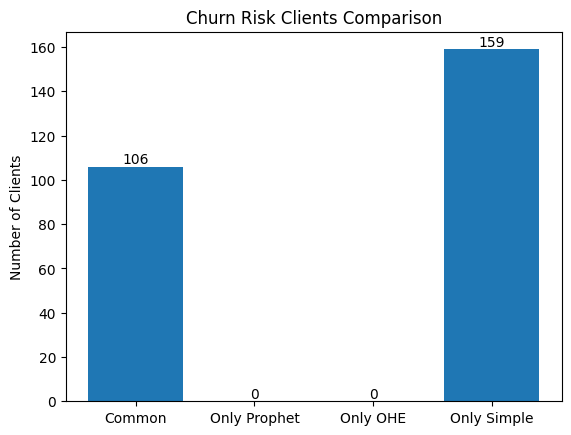

In [181]:
# Convert to sets for easier comparison
set_simple = set(total_lost_per_client['client_id'].unique())
set_prophet = set(churn_segments_ohe['high']['client_id'].unique())
set_ohe = set(churn_segments_ohe['high']['client_id'].unique())

# Find the intersection and differences
common_clients = set_prophet.intersection(set_ohe)  # Common in both Prophet and OHE
only_prophet = set_prophet - set_ohe                # Only in Prophet
only_ohe = set_ohe - set_prophet                    # Only in OHE
only_simple = set_simple - (set_prophet.union(set_ohe))  # Only in Simple

# Combine all counts into a list for plotting
counts = [
    len(common_clients),
    len(only_prophet),
    len(only_ohe),
    len(only_simple)
]

# Bar labels
labels = ['Common', 'Only Prophet', 'Only OHE', 'Only Simple']

# Plotting
bars = plt.bar(labels, counts)
plt.ylabel('Number of Clients')
plt.title('Churn Risk Clients Comparison')

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')  # Centering the text above the bar

plt.show()

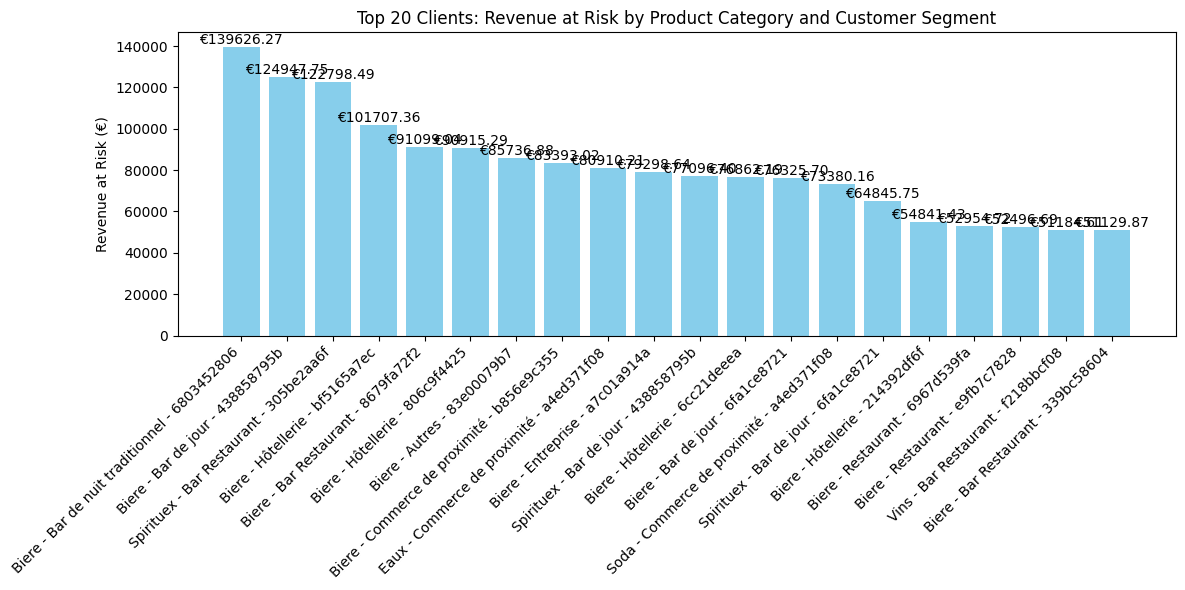

In [183]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming churned_clients is a list or set of identified churned client IDs
churned_clients = set(total_lost_per_client['client_id'].unique())

# Filter the main DataFrame to only include churned clients
churned_data = data_no_out[data_no_out['client_id'].isin(churned_clients)]

# Calculate total revenue at risk by product category and customer segment
revenue_at_risk = churned_data.groupby(['product_category', 'customer_segment', 'client_id'])['revenue'].sum().reset_index()

# Sort by revenue for better visualization and get top 20 clients
top_clients = revenue_at_risk.sort_values(by='revenue', ascending=False).head(20)

# Create a combined label for the x-axis
top_clients['label'] = top_clients['product_category'] + ' - ' + top_clients['customer_segment'] + ' - ' + top_clients['client_id']

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_clients['label'], top_clients['revenue'], color='skyblue')

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'€{yval:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.ylabel('Revenue at Risk (€)')
plt.title('Top 20 Clients: Revenue at Risk by Product Category and Customer Segment')
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

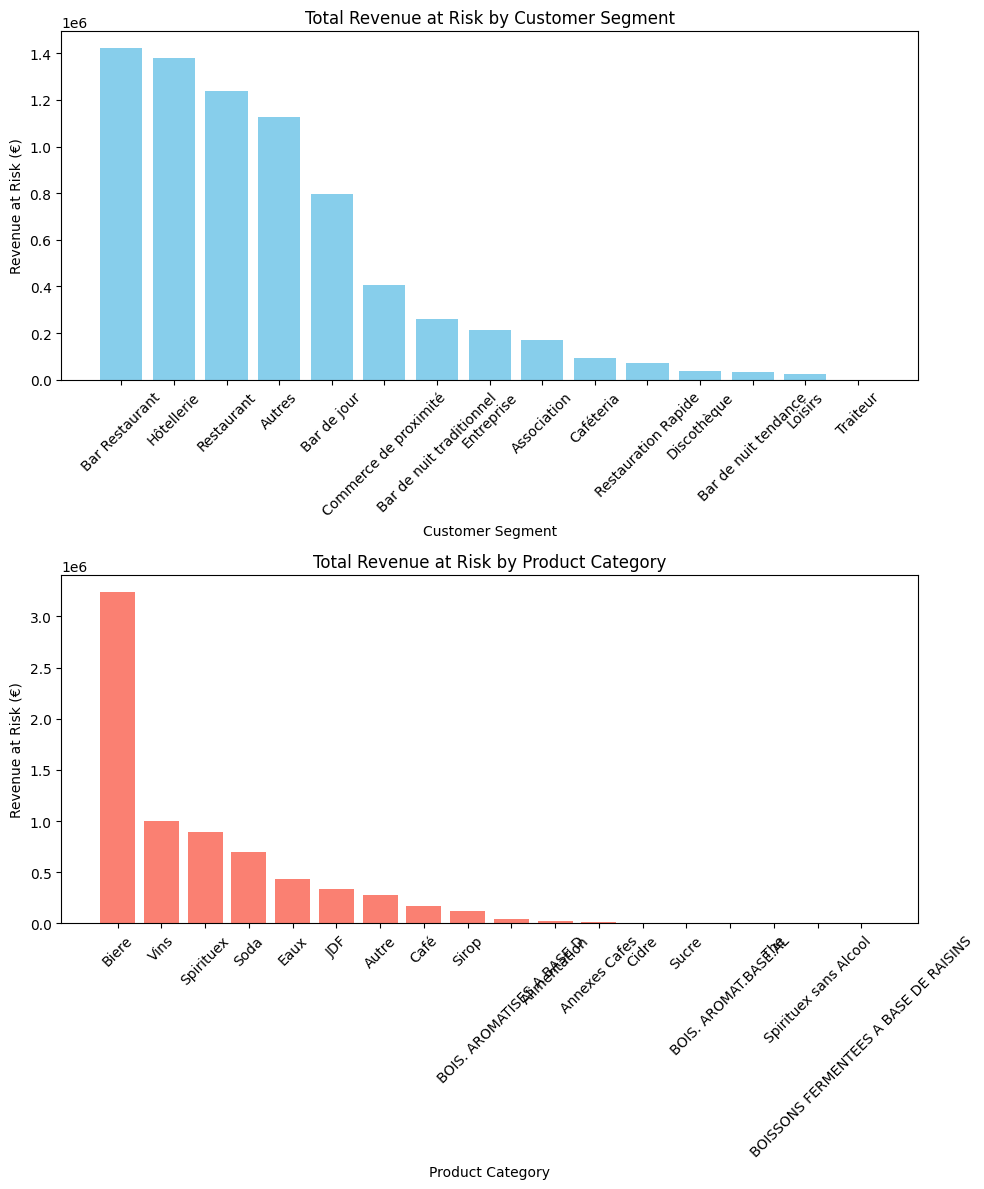

In [187]:
# Assuming churned_clients is a set of identified churned client IDs
churned_clients = set(total_lost_per_client['client_id'].unique())

# Filter the main DataFrame to only include churned clients
churned_data = data_no_out[data_no_out['client_id'].isin(churned_clients)]

# Calculate total revenue at risk by product category and customer segment
revenue_at_risk = churned_data.groupby(['product_category', 'customer_segment'])['revenue'].sum().reset_index()

# Calculate total revenue at risk by customer segment
revenue_by_segment = revenue_at_risk.groupby('customer_segment')['revenue'].sum().reset_index()

# Calculate total revenue at risk by product category
revenue_by_product = revenue_at_risk.groupby('product_category')['revenue'].sum().reset_index()

# Sort by revenue in descending order
revenue_by_segment = revenue_by_segment.sort_values(by='revenue', ascending=False)
revenue_by_product = revenue_by_product.sort_values(by='revenue', ascending=False)

# Set up the figure and axes
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot total revenue at risk by customer segment
axs[0].bar(revenue_by_segment['customer_segment'], revenue_by_segment['revenue'], color='skyblue')
axs[0].set_title('Total Revenue at Risk by Customer Segment')
axs[0].set_ylabel('Revenue at Risk (€)')
axs[0].set_xlabel('Customer Segment')
axs[0].tick_params(axis='x', rotation=45)

# Plot total revenue at risk by product category
axs[1].bar(revenue_by_product['product_category'], revenue_by_product['revenue'], color='salmon')
axs[1].set_title('Total Revenue at Risk by Product Category')
axs[1].set_ylabel('Revenue at Risk (€)')
axs[1].set_xlabel('Product Category')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Improve State Calculation Performance with Prophet:
The simplistic churn calculation provided a direct, binary estimate of revenue loss due to clients who haven't ordered within a month.

Use of Prophet to forecast future revenues based on historical patterns for each client. This gives a more accurate estimate of potential churn impact by predicting the revenue loss for clients who are at risk of churning. Prophet's predictions show a more nuanced perspective, allowing for recovery and growth despite churn, providing a more optimistic forecast. This enhances current €3.7M churn impact by adding a forward-looking view - here 6 monhts where chosen.
The 39.6% churn risk helps quantify how much of the potential revenue is still at risk. 

Prophet model segments clients by growth, stability, or decline in revenue. It gives more granularity to your churn calculation by differentiating between clients who may churn in the future and those who are simply experiencing temporary fluctuations. It incorporates more variables into the forecast, such as client segmentation or product category trends.

Challenges in Churn Risk Calculation:

Gaps in the data: Some clients might have missing or insufficient historical transaction data, causing Prophet to produce unreliable forecasts. This can result in over- or under-estimating churn risk. The threshold for churn (here no transactions for one month) might be too simplistic and may not capture complex behaviors like seasonal purchasing.

Improved Feature Engineering: Include more features like seasonality, client type, and customer segment into your Prophet model. This could make predictions more reflective of actual business cycles.

Hybrid Models: Use Prophet forecasts along with a classification model (e.g., Random Forest or XGBoost) to predict churn risk. This allows you to balance time-series forecasting with client behavior patterns to get a more holistic view of churn risk.

# Scalability & Adaptability:

The approach is relatively scalable because the churn risk and dropped product detection can be extended to any product or client segment by adjusting the reference period and thresholds for dropped products.
Adaptability: By tuning the models to different regions, industries, and client types, the same process can be applied to other clients. Additional data points (e.g., market trends, competitor actions) could be incorporated to improve the model.

# Is the Distributor a Good Client for MYWAY?:
the distributor shows significant revenue potential in the near future but also a moderate churn risk due to dropped products in some key categories. This distributor represents a strong potential client for MYWAY, especially if proactive measures are taken to address the dropped products and churn risk identified. e.g re-engagement campaigns for dropped products or introducing new, relevant products—they could increase their overall purchases and reduce churn.

---

# Export of product_states and churn_states into csv files

In [193]:
# Create the churn_states DataFrame
churn_states = pd.DataFrame({
    'client_id': data_no_out['client_id'],
    'churned_simple': data_no_out['client_id'].isin(set_simple),
    'churned_prophet': data_no_out['client_id'].isin(set_prophet)
})

# Convert boolean values to True/False
churn_states['churned_simple'] = churn_states['churned_simple'].replace({True: True, False: False})
churn_states['churned_prophet'] = churn_states['churned_prophet'].replace({True: True, False: False})

# Export the churn_states DataFrame to a CSV file
churn_states.to_csv('churn_states.csv', index=False)

# Optionally, display the new DataFrame
churn_states.head()

,client_id,churned_simple,churned_prophet
0,f218bbcf08,True,False
1,f218bbcf08,True,False
2,f218bbcf08,True,False
3,f218bbcf08,True,False
4,cb6df13f84,True,False


In [211]:
# Create a DataFrame with all product_ids from data_no_out
product_states = pd.DataFrame(data_no_out['product_id'].unique(), columns=['product_id'])

# Create the dropped_product column
product_states['dropped_product'] = product_states['product_id'].isin(total_lost_per_product['product_id'])
product_states.to_csv('product_states.csv', index=False)


In [213]:
# Count True and False values in the dropped_product column
dropped_product_counts = product_states['dropped_product'].value_counts()
dropped_product_counts

True     1498
False     100
Name: dropped_product, dtype: int64

In [209]:
data_no_out.product_id.nunique()

1598

---

# Proposal for Personalizing Next Best Action (NBA) for Sales Reps
By leveraging historical sales data, rep profiles, and customer insights, we can create a system delivering personalized NBA recommendations tailored to each sales rep's strengths and growth areas.

## Data Collection
- Sales Performance Data: Transaction history by product category, deal size, and sales cycle duration for each rep, including conversion rates.

- Rep Profiles: Self-assessments or manager evaluations of strengths and weaknesses in competencies (e.g., negotiation skills, product knowledge). Work Preferences: Preferred communication styles (e.g., face-to-face, email, phone).
- Customer Data: Historical data on customer interactions and preferences to identify successful reps with specific segments.

- Training and Development: Courses completed and targeted improvement areas expressed during management discussions.

## Machine Learning
We can use classification algorithms (e.g., Random Forest, XGBoost) to train models on features like rep profiles, customer characteristics, and historical success metrics to predict the effectiveness of actions. Additionally, regression models could estimate the potential revenue impact of NBAs. A reinforcement learning model would continuously adapt based on the outcomes of recommended actions.

Ensuring Growth and Improvement
Identify both strengths and improvement areas using machine learning models. Recommendations should balance actions that leverage strengths with those that challenge weaker areas. Implement a feedback mechanism for reps to provide input on recommendations for real-time adjustments.

## Measuring Success
Key Performance Indicators (KPIs):

- Sales Growth: Measure the increase in sales volume and revenue attributed to personalized recommendations.
- Conversion Rates: Track improvements in conversion rates for recommended actions.
- Rep Engagement: Monitor feedback from sales reps on the relevance of recommendations.
- Conduct A/B tests to compare the performance of reps using personalized recommendations against those using a generic approach.

## Continuous Improvement
Regularly update and retrain models with new sales data to adapt to market changes. Continuously gather feedback from reps and modify the recommendation engine based on their experiences. Create dashboards to visualize rep performance metrics and the impact of personalized recommendations.